<a href="https://colab.research.google.com/github/TirthankarDasThakur/MTech_CODE_ML-DL/blob/main/Laptop_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
import seaborn as sns

sns.set_theme(palette='colorblind')

In [6]:
df_train = pd.read_csv('laptops_train.csv')
df_train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [7]:
df_train = pd.read_csv('laptops_test.csv')
df_train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,4881708.0


**Data Preprocessing Part 1**

In [8]:
# Remove 'kg' suffix from 'Weight' column
df_train['Weight'] = df_train['Weight'].str.rstrip('kg')  # using rstrip() instead of strip() to only remove from the right side of the string

# Remove double quotes suffix from 'Screen Size' column
df_train['Screen Size'] = df_train['Screen Size'].str.rstrip('"')  # using rstrip() instead of strip() to only remove from the right side of the string

# Print first few rows of modified dataframe
print(df_train.head())

  Manufacturer                         Model Name            Category  \
0           HP  15-bs053od (i7-7500U/6GB/1TB/W10)            Notebook   
1         Asus                   Rog GL753VE-DS74              Gaming   
2         Dell                      Inspiron 7579  2 in 1 Convertible   
3      Toshiba                  Portege Z30-C-1CV            Notebook   
4       Lenovo                  IdeaPad 320-15ABR            Notebook   

  Screen Size                                     Screen  \
0        15.6                                   1366x768   
1        17.3                          Full HD 1920x1080   
2        15.6  IPS Panel Full HD / Touchscreen 1920x1080   
3        13.3                          Full HD 1920x1080   
4        15.6                          Full HD 1920x1080   

                           CPU   RAM               Storage  \
0   Intel Core i7 7500U 2.7GHz   6GB               1TB HDD   
1  Intel Core i7 7700HQ 2.8GHz  16GB  256GB SSD +  1TB HDD   
2   Intel Core

In [9]:
df_train.dtypes

Manufacturer                 object
Model Name                   object
Category                     object
Screen Size                  object
Screen                       object
CPU                          object
RAM                          object
 Storage                     object
GPU                          object
Operating System             object
Operating System Version     object
Weight                       object
Price                       float64
dtype: object

In [10]:
# Convert 'Weight' column to float datatype
df_train['Weight'] = df_train['Weight'].astype(float, errors='ignore')  # using 'ignore' to leave any non-numeric values as they are

# Convert 'Screen Size' column to float datatype
df_train['Screen Size'] = df_train['Screen Size'].astype(float, errors='ignore')  # using 'ignore' to leave any non-numeric values as they are

In [11]:
import re

# Define a regular expression to match only digits
pattern = r'\d+'

# Apply the regular expression to the 'Weight' column and extract only the digits
df_train['Weight'] = df_train['Weight'].apply(lambda x: re.findall(pattern, x)[0])

# Convert the 'Weight' column to float datatype
df_train['Weight'] = df_train['Weight'].astype(float)

In [12]:
# Convert 'Weight' column to float datatype
df_train['Weight'] = df_train['Weight'].astype(float)

# Convert 'Screen Size' column to float datatype
df_train['Screen Size'] = df_train['Screen Size'].astype(float)

In [13]:
df_train.dtypes

Manufacturer                 object
Model Name                   object
Category                     object
Screen Size                 float64
Screen                       object
CPU                          object
RAM                          object
 Storage                     object
GPU                          object
Operating System             object
Operating System Version     object
Weight                      float64
Price                       float64
dtype: object

In [14]:
def fetch_processor(text):
  if 'Intel Core i5' in text:
      return 'Intel Core i5'
  elif 'Intel Core i7' in text:
      return 'Intel Core i7' 
  elif 'Intel Core i3' in text:
      return 'Other Intel Processor' 
  else:
      return 'AMD Processor' 

In [15]:
df_train['CPU brand'] = df_train['CPU'].apply(fetch_processor)

<Axes: >

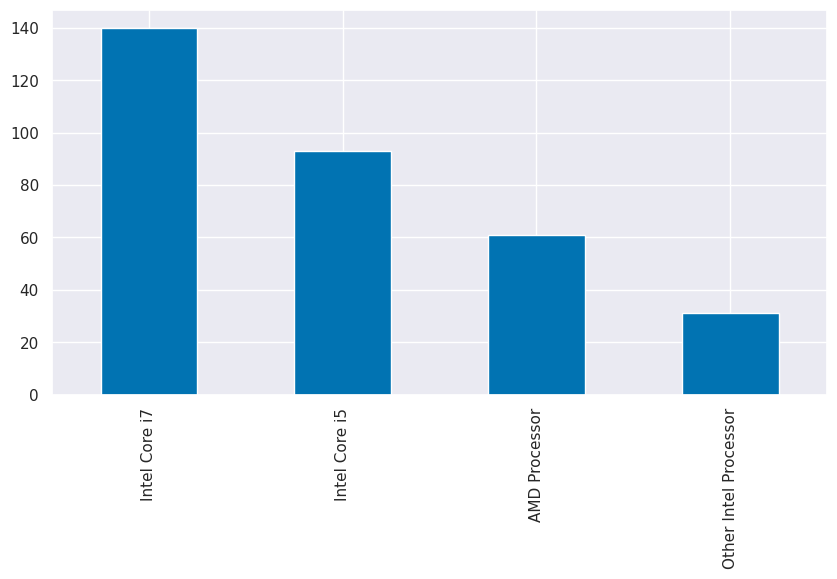

In [16]:
plt.figure(figsize=(10,5))
df_train['CPU brand'].value_counts().plot(kind= 'bar')

In [17]:
def fetch_(text):
  if 'Intel' in text:
      return 'Intel'
  elif 'AMD' in text:
      return 'AMD' 
  elif 'Nvidia' in text:
      return 'Nvidia' 
  else:
      return 'Other GPU' 

In [18]:
df_train['GPU brand'] = df_train['GPU'].apply(fetch_processor)

<Axes: >

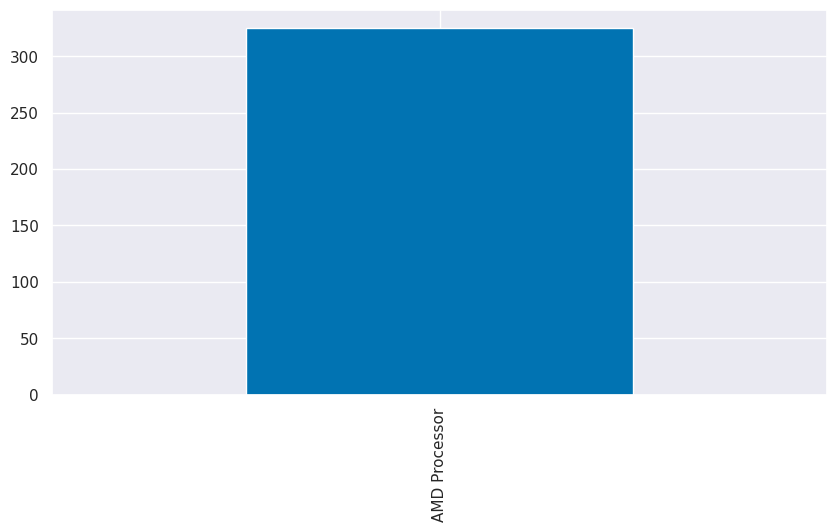

In [19]:
plt.figure(figsize=(10,5))
df_train['GPU brand'].value_counts().plot(kind= 'bar')

In [20]:
df_train['Operating System'] = df_train['Operating System'].replace('Mac OS', 'macOS')

In [21]:
df_train['Screen Quality'] = df_train['Screen'].str.slice(-9)

<Axes: >

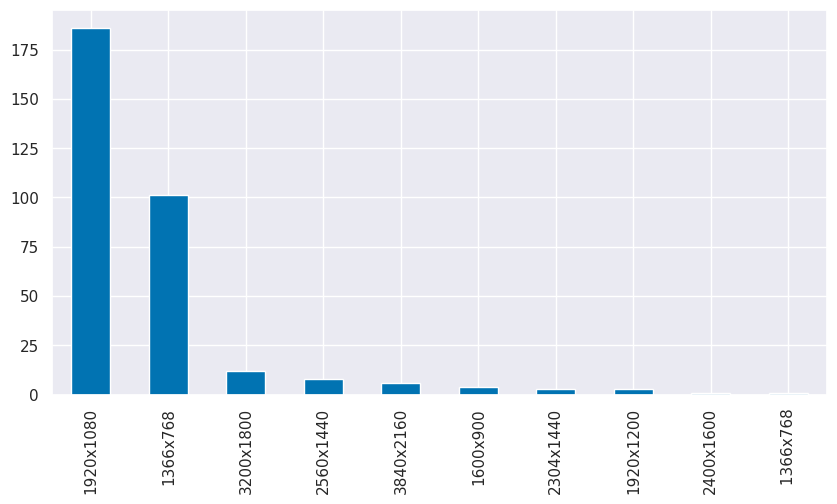

In [22]:
plt.figure(figsize=(10,5))
df_train['Screen Quality'].value_counts().plot(kind= 'bar')

In [23]:
def fetch_(text):
  if '128GB SSD' in text:
      return '1128 SSD'
  elif '256GB SSD' in text:
      return '256GB SSD' 
  elif '512GB SSD' in text:
      return 'Nvidia'
  elif '500GB SSD' in text:
      return '500GB SSD' 
  elif 'Flash Storage' in text:
      return 'Flash Storage'  
  else:
      return 'Mixed Storage' 

In [24]:
df_train['Storage'] = df_train[' Storage'].replace('fetch_Storage')

<Axes: >

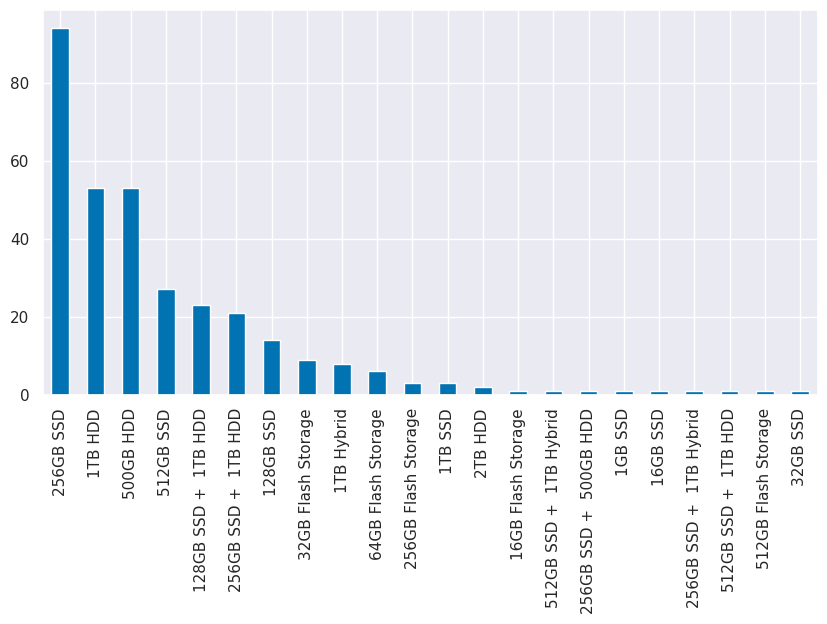

In [25]:
plt.figure(figsize=(10,5))
df_train['Storage'].value_counts().plot(kind= 'bar')

**Exploratory Data Analysis**

In [26]:
for col in df_train.select_dtypes(include='object').columns:
    print(col, df_train[col].unique())

Manufacturer ['HP' 'Asus' 'Dell' 'Toshiba' 'Lenovo' 'Fujitsu' 'Acer' 'MSI' 'Vero'
 'Apple' 'Razer' 'Samsung']
Model Name ['15-bs053od (i7-7500U/6GB/1TB/W10)' 'Rog GL753VE-DS74' 'Inspiron 7579'
 'Portege Z30-C-1CV' 'IdeaPad 320-15ABR' 'LifeBook A556' 'Tecra A40-C-1KF'
 'Inspiron 3567' 'Probook 450' 'Legion Y520-15IKBN' 'Inspiron 5567'
 'Latitude 5480' 'EliteBook Folio' '15-bs005nv (i3-6006U/4GB/1TB'
 'V110-15IAP (N3350/4GB/128GB/No' 'ThinkPad T560' 'Inspiron 5378'
 'ZenBook UX310UA-FB485T' 'Spectre 13-V111dx' 'Aspire ES1-533'
 'Rog GL553VE-DS74' 'EliteBook 840' 'Nitro 5' 'ENVY -' 'Vostro 3568'
 'Probook 440' 'Portege Z30-C-16H' 'ProBook 640' 'EliteBook 1040'
 'ProBook 440' 'Inspiron 7567' 'EliteBook 820' 'Elitebook 840'
 'Probook 430' 'Portege A30-C-1CZ' 'ProBook 450' 'ThinkPad P70'
 'Tecra Z40-C-12Z' 'Inspiron 5568' 'Portégé Z30-C-16K' 'Spectre 13-V100nv'
 'Latitude E5570' 'Elitebook 820' 'ProBook 650' 'XPS 13' 'Probook 470'
 'Aspire 3' 'GL72M 7RDX' 'Probook 640' 'EliteBook 850' 'Tecra

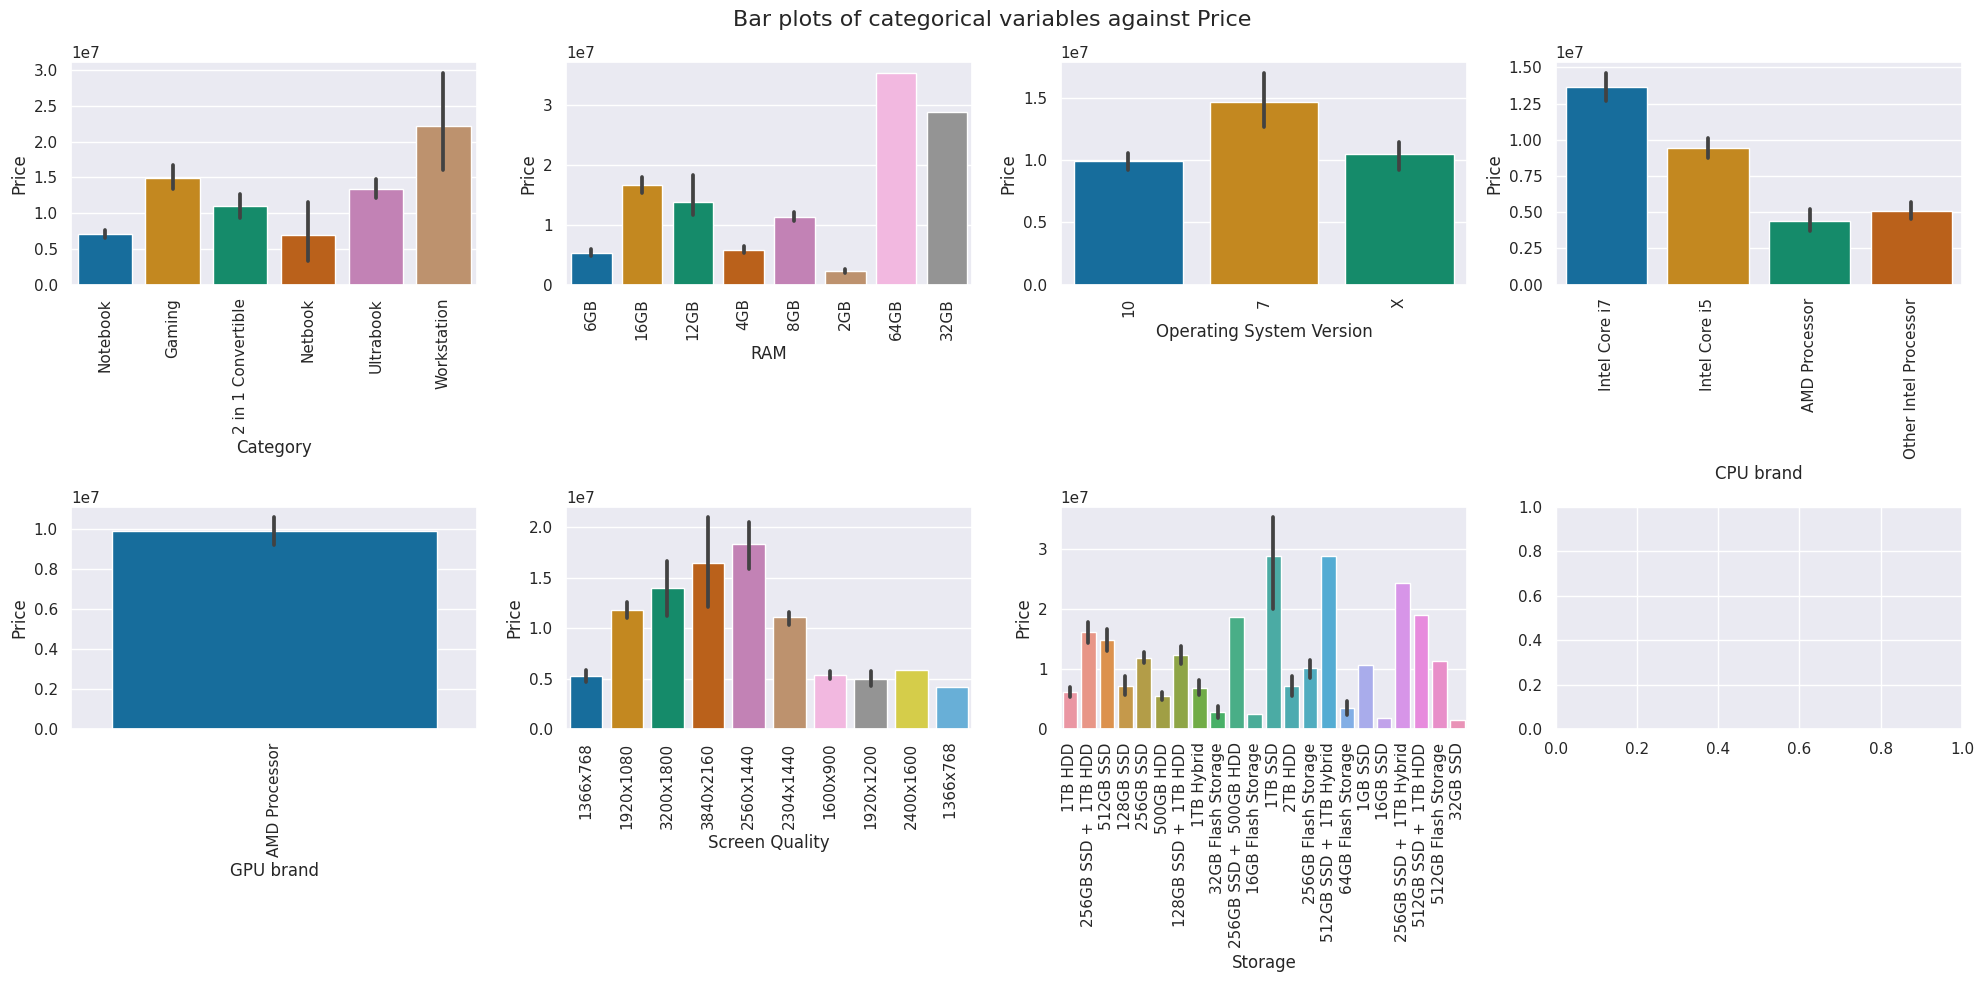

In [27]:
# List of categorical variable to plot
cat_vars = ['Category', 'RAM', 'Operating System Version', 'CPU brand', 'GPU brand', 'Screen Quality', 'Storage']

# Create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# create barplot for each categorical variable 
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Price', data=df_train, ax=axs[i//4, i%4])
    axs[i//4, i%4].set_xticklabels(axs[i//4, i%4].get_xticklabels(), rotation=90)

# add plot title
fig.suptitle('Bar plots of categorical variables against Price', fontsize=16)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

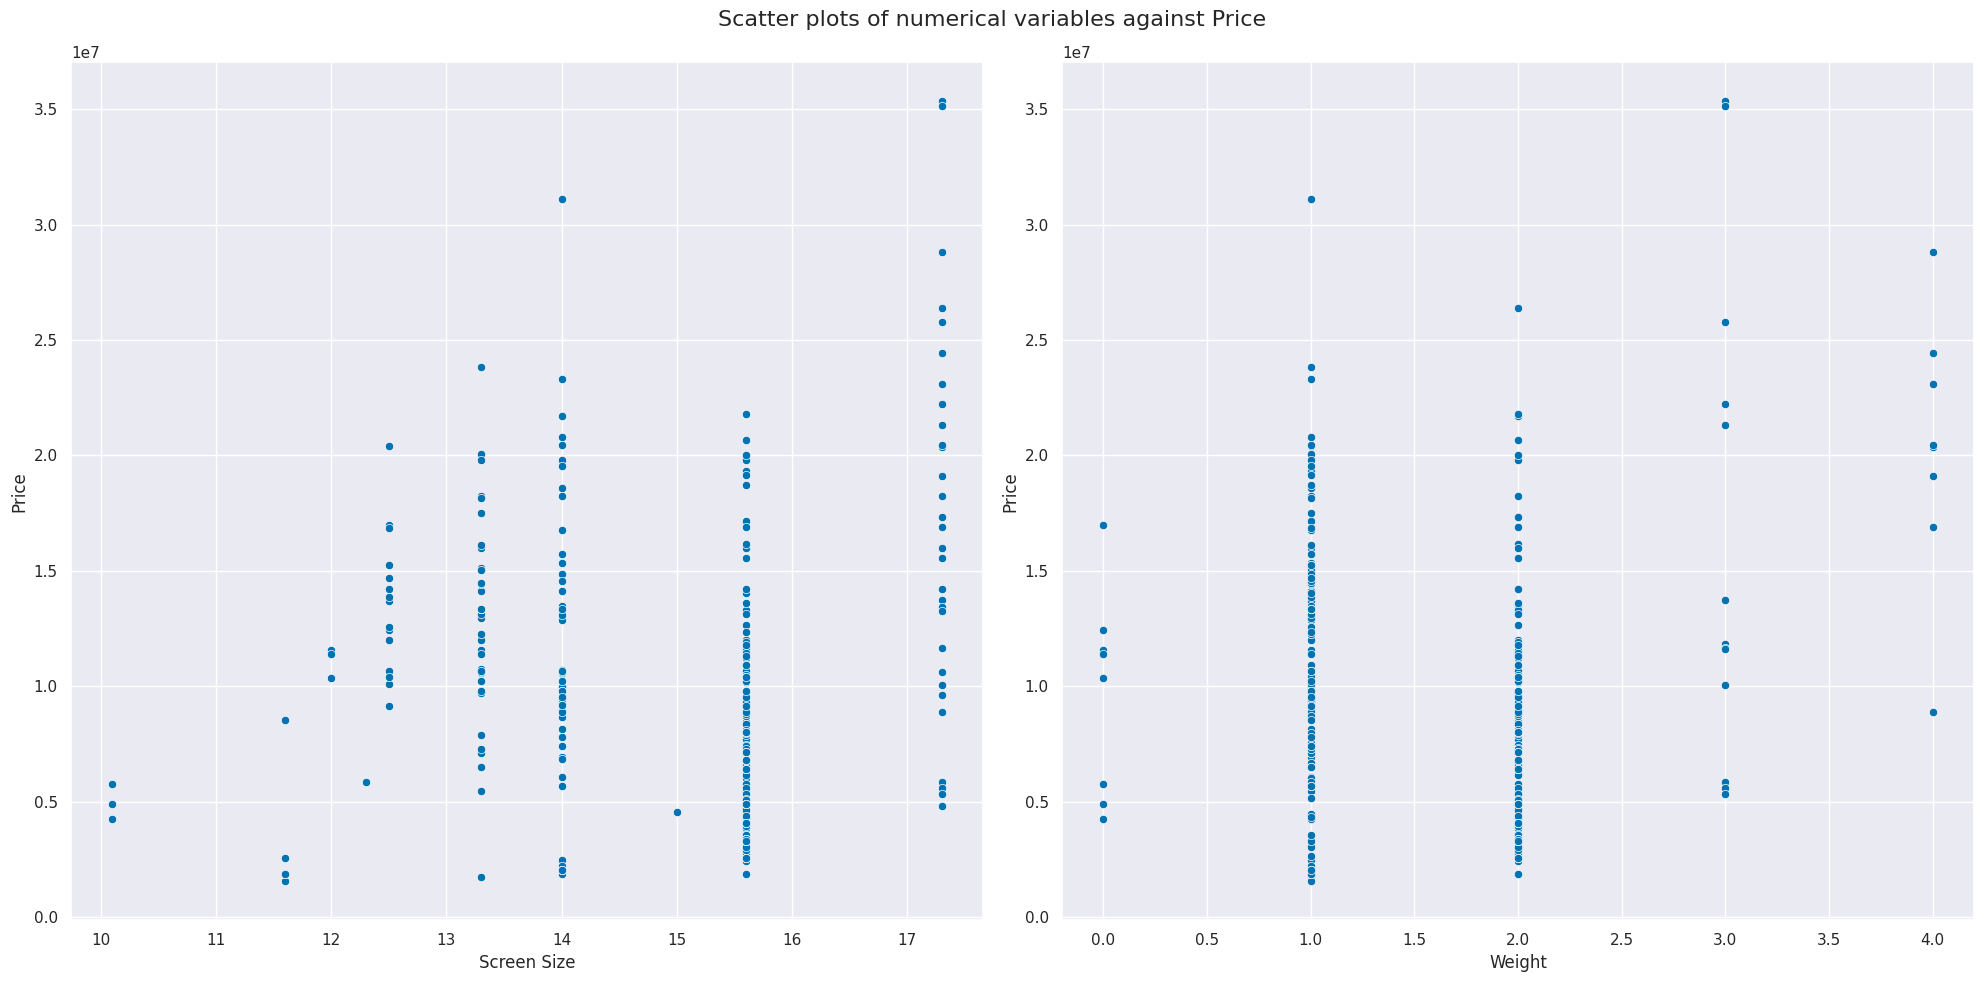

In [28]:
num_vars = ['Screen Size', 'Weight']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

# create scatterplot for each numerical variable
for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='Price', data=df_train, ax=axs[i])

# add plot title
fig.suptitle('Scatter plots of numerical variables against Price', fontsize=16)

# adjust spacing between subplots
fig.tight_layout()

plt.show()

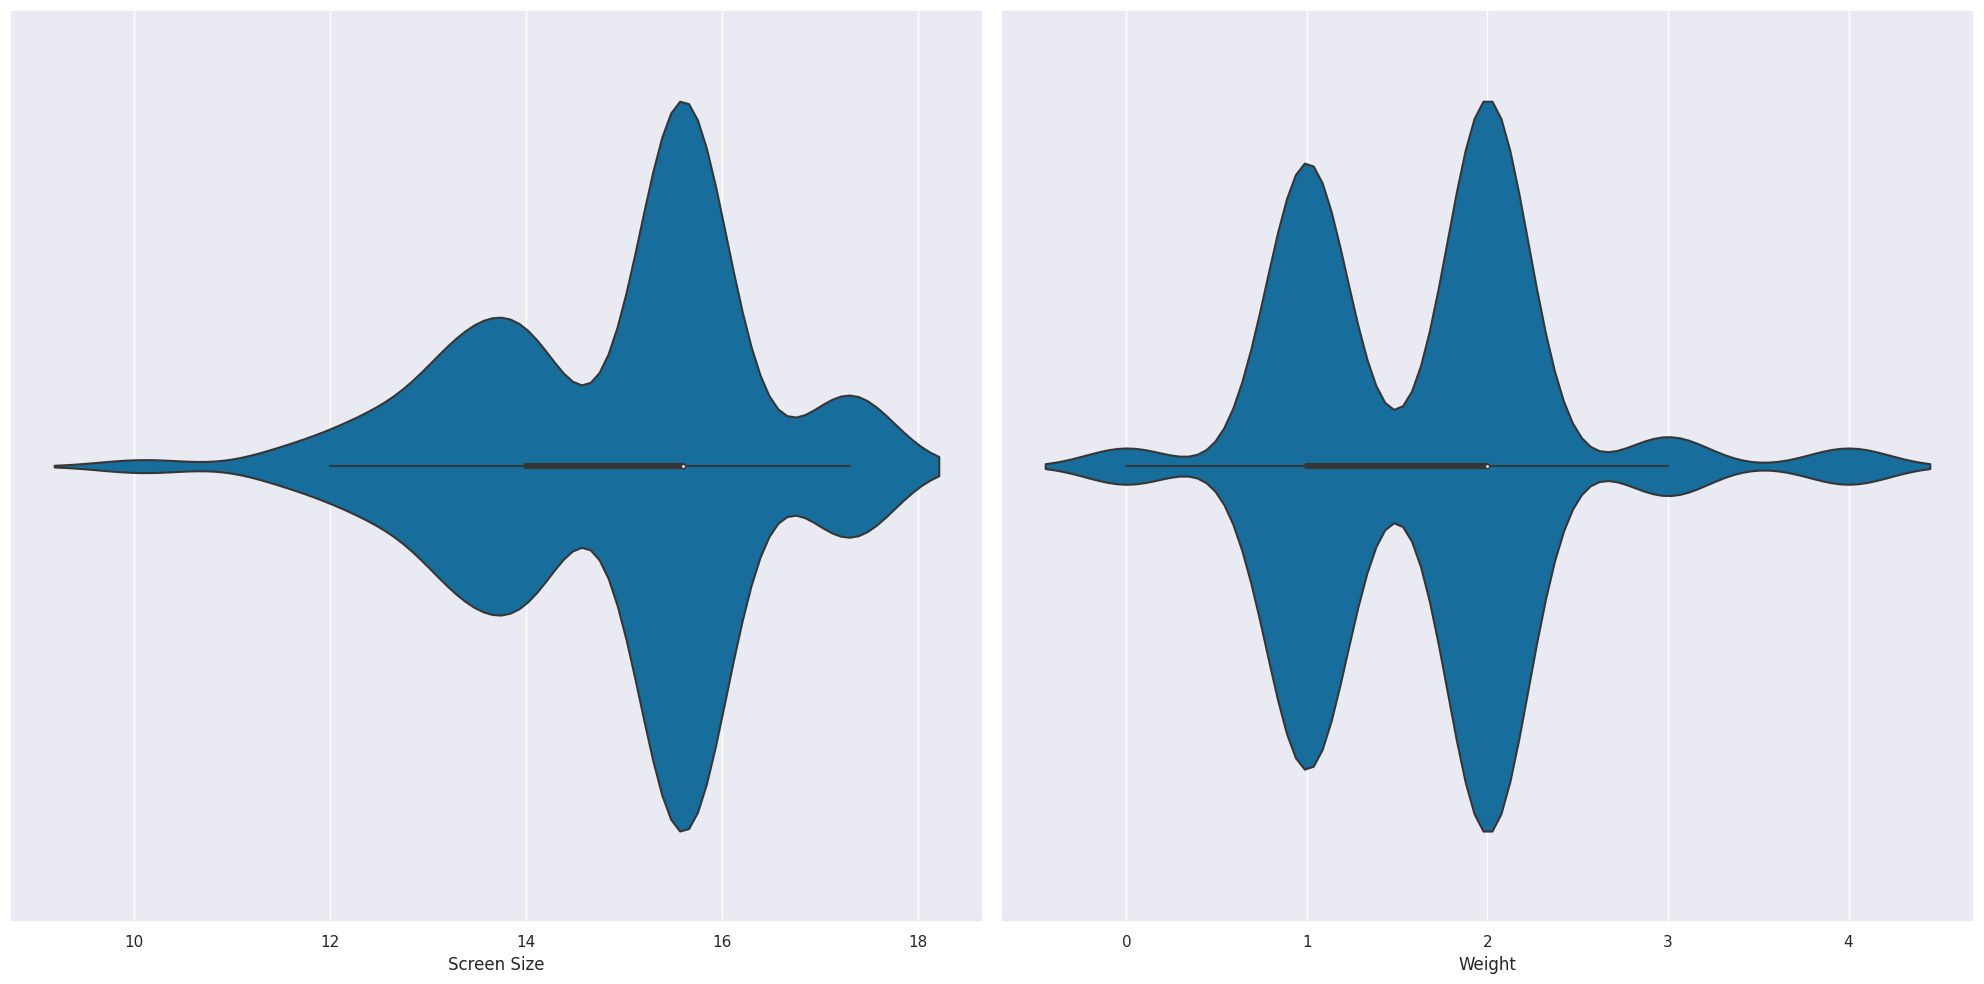

In [29]:
num_vars =['Screen Size', 'Weight']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df_train, ax=axs[i])

fig.tight_layout()

plt.show()

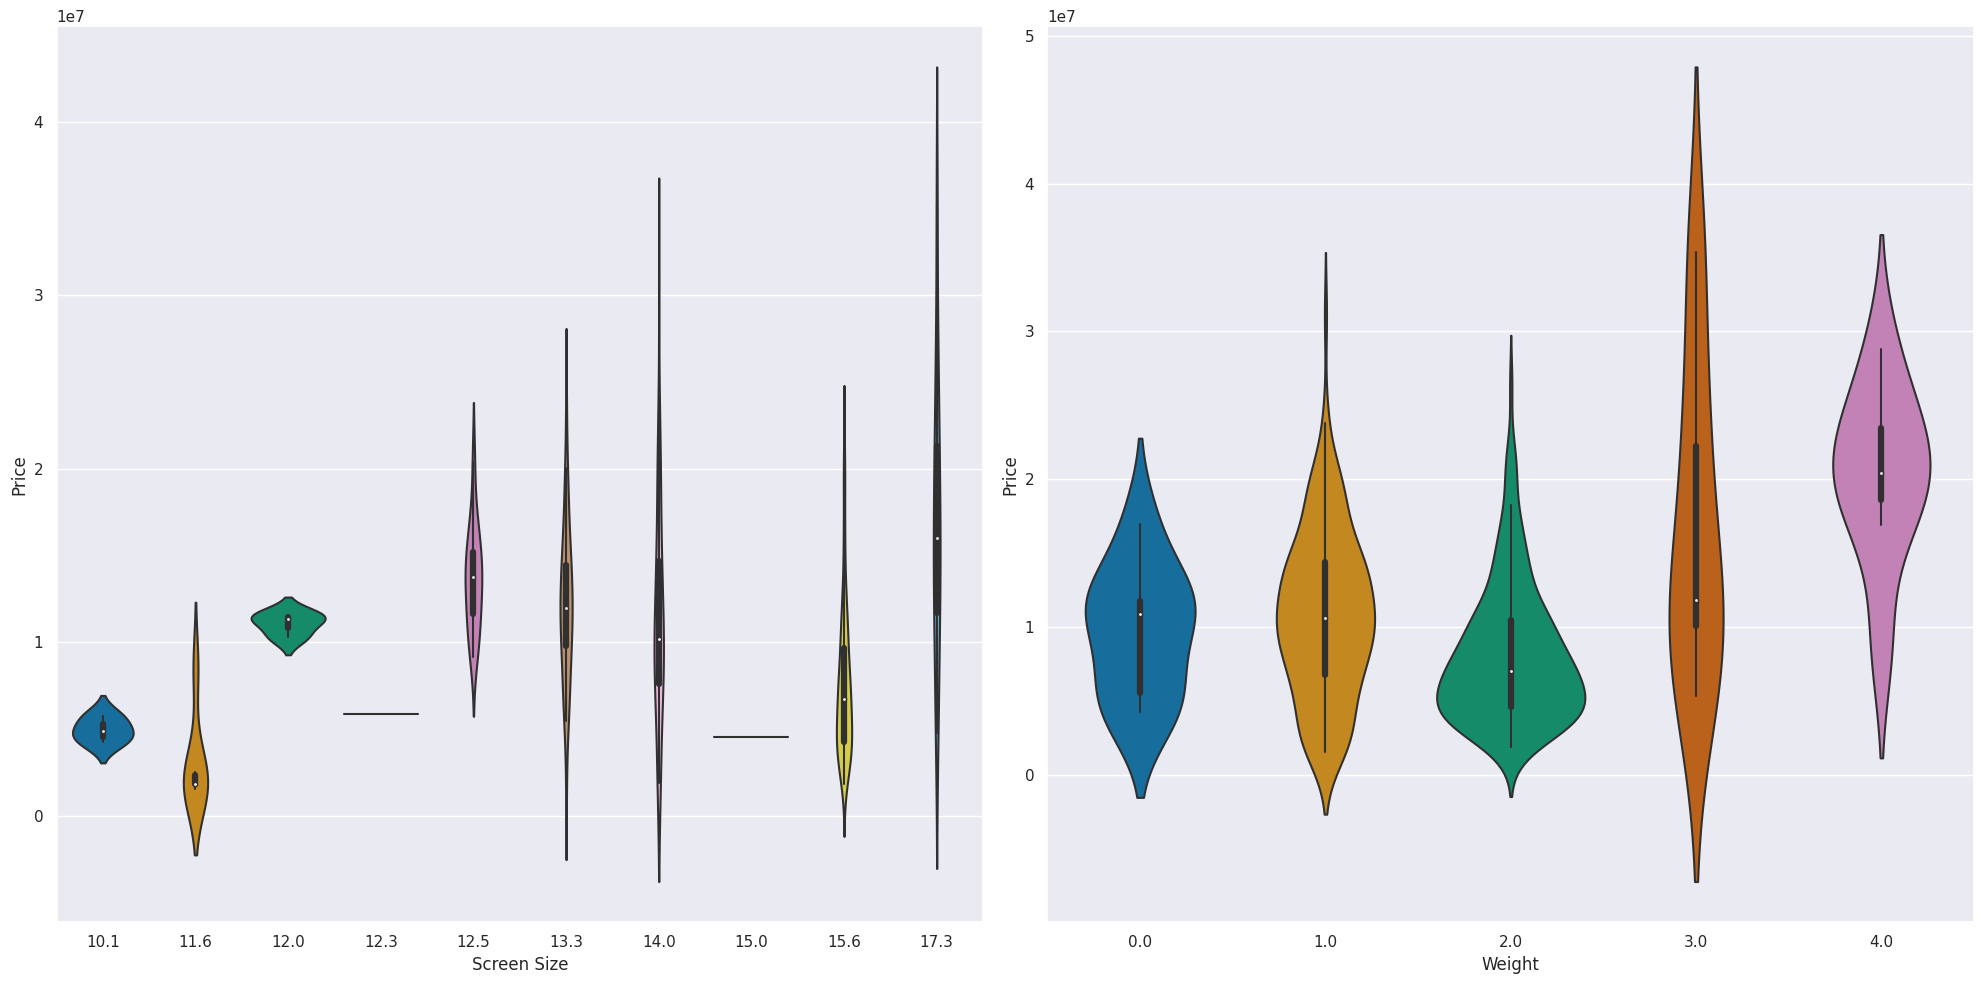

In [30]:
num_vars =['Screen Size', 'Weight']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, y='Price', data=df_train, ax=axs[i])

fig.tight_layout()

plt.show()

**Data Processing Part 2**

In [31]:
df_train.drop(columns=['Model Name', 'Screen', 'CPU', 'Storage', 'GPU'], inplace=True)
print(df_train.shape)

(325, 12)


In [32]:
df_train.head()

,Manufacturer,Category,Screen Size,RAM,Storage,Operating System,Operating System Version,Weight,Price,CPU brand,GPU brand,Screen Quality
0,HP,Notebook,15.6,6GB,1TB HDD,Windows,10,2.0,5148468.0,Intel Core i7,AMD Processor,1366x768
1,Asus,Gaming,17.3,16GB,256GB SSD + 1TB HDD,Windows,10,2.0,15552108.0,Intel Core i7,AMD Processor,1920x1080
2,Dell,2 in 1 Convertible,15.6,12GB,512GB SSD,Windows,10,2.0,11550708.0,Intel Core i7,AMD Processor,1920x1080
3,Toshiba,Notebook,13.3,4GB,128GB SSD,Windows,7,1.0,10625940.0,Intel Core i5,AMD Processor,1920x1080
4,Lenovo,Notebook,15.6,6GB,256GB SSD,Windows,10,2.0,4881708.0,AMD Processor,AMD Processor,1920x1080


In [33]:
check_missing = df_train.isnull().sum() * 100 / df_train.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Operating System Version    10.461538
dtype: float64

In [34]:
df_train.fillna('Unknown', inplace=True)
df_train.head()

,Manufacturer,Category,Screen Size,RAM,Storage,Operating System,Operating System Version,Weight,Price,CPU brand,GPU brand,Screen Quality
0,HP,Notebook,15.6,6GB,1TB HDD,Windows,10,2.0,5148468.0,Intel Core i7,AMD Processor,1366x768
1,Asus,Gaming,17.3,16GB,256GB SSD + 1TB HDD,Windows,10,2.0,15552108.0,Intel Core i7,AMD Processor,1920x1080
2,Dell,2 in 1 Convertible,15.6,12GB,512GB SSD,Windows,10,2.0,11550708.0,Intel Core i7,AMD Processor,1920x1080
3,Toshiba,Notebook,13.3,4GB,128GB SSD,Windows,7,1.0,10625940.0,Intel Core i5,AMD Processor,1920x1080
4,Lenovo,Notebook,15.6,6GB,256GB SSD,Windows,10,2.0,4881708.0,AMD Processor,AMD Processor,1920x1080


In [35]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df_train.select_dtypes(include=['object']).columns:
    # Print the column name and the unique values:
    print(f"{col}: {df_train[col].unique()}")

Manufacturer: ['HP' 'Asus' 'Dell' 'Toshiba' 'Lenovo' 'Fujitsu' 'Acer' 'MSI' 'Vero'
 'Apple' 'Razer' 'Samsung']
Category: ['Notebook' 'Gaming' '2 in 1 Convertible' 'Netbook' 'Ultrabook'
 'Workstation']
RAM: ['6GB' '16GB' '12GB' '4GB' '8GB' '2GB' '64GB' '32GB']
 Storage: ['1TB HDD' '256GB SSD +  1TB HDD' '512GB SSD' '128GB SSD' '256GB SSD'
 '500GB HDD' '128GB SSD +  1TB HDD' '1TB Hybrid' '32GB Flash Storage'
 '256GB SSD +  500GB HDD' '16GB Flash Storage' '1TB SSD' '2TB HDD'
 '256GB Flash Storage' '512GB SSD +  1TB Hybrid' '64GB Flash Storage'
 '1GB SSD' '16GB SSD' '256GB SSD +  1TB Hybrid' '512GB SSD +  1TB HDD'
 '512GB Flash Storage' '32GB SSD']
Operating System: ['Windows' 'No OS' 'Chrome OS' 'macOS' 'Linux' 'Android']
Operating System Version: ['10' '7' 'Unknown' 'X']
CPU brand: ['Intel Core i7' 'Intel Core i5' 'AMD Processor' 'Other Intel Processor']
GPU brand: ['AMD Processor']
Screen Quality: ['1366x768' '1920x1080' '3200x1800' '3840x2160' '2560x1440' '2304x1440'
 '1600x900' '1920x

In [36]:
from sklearn import preprocessing 

# Loop over each column in the DataFrame where dtype is 'object'
for col in df_train.select_dtypes(include=['object']).columns:

   # Initialize a LabelEncoder object
   label_encoder = preprocessing.LabelEncoder()

   # Fit the encoder to the unique values in the column 
   label_encoder.fit(df_train[col].unique())

   # Transform the column using the encoder
   df_train[col] = label_encoder.transform(df_train[col])

   # Print the column name and the unique encoded values
   print(f"{col}: {df_train[col].unique()}")

Manufacturer: [ 5  2  3 10  6  4  0  7 11  1  8  9]
Category: [3 1 0 2 4 5]
RAM: [6 1 0 4 7 2 5 3]
 Storage: [ 5 10 18  0  9 16  1  6 14 12  2  7 13  8 20 21  4  3 11 19 17 15]
Operating System: [4 3 1 5 2 0]
Operating System Version: [0 1 2 3]
CPU brand: [2 1 0 3]
GPU brand: [0]
Screen Quality: [1 3 8 9 7 5 2 4 6 0]


In [37]:
df_train.dtypes

Manufacturer                  int64
Category                      int64
Screen Size                 float64
RAM                           int64
 Storage                      int64
Operating System              int64
Operating System Version      int64
Weight                      float64
Price                       float64
CPU brand                     int64
GPU brand                     int64
Screen Quality                int64
dtype: object

**Remove Outlier Using Z-Score**

In [38]:
from scipy import stats

# Define a function to remove outliers using z-score for selected numerical columns
def remove_outliers(df_train, cols, threshold=3):
    # Loop over each selected column
    for col in cols:
        # Calculate z-score for each data point in selected column
        z = np.abs(stats.zscore(df_train[col]))
        # Remove rows with z-score greater than threshold in selected column
        df_train = df_train[(z < threshold) | (df_train[col].isnull())]
    return df_train

In [39]:
selected_cols = ['Screen Size', 'Weight']
df_clean = remove_outliers(df_train, selected_cols)
df_clean.shape

(314, 12)

<Axes: >

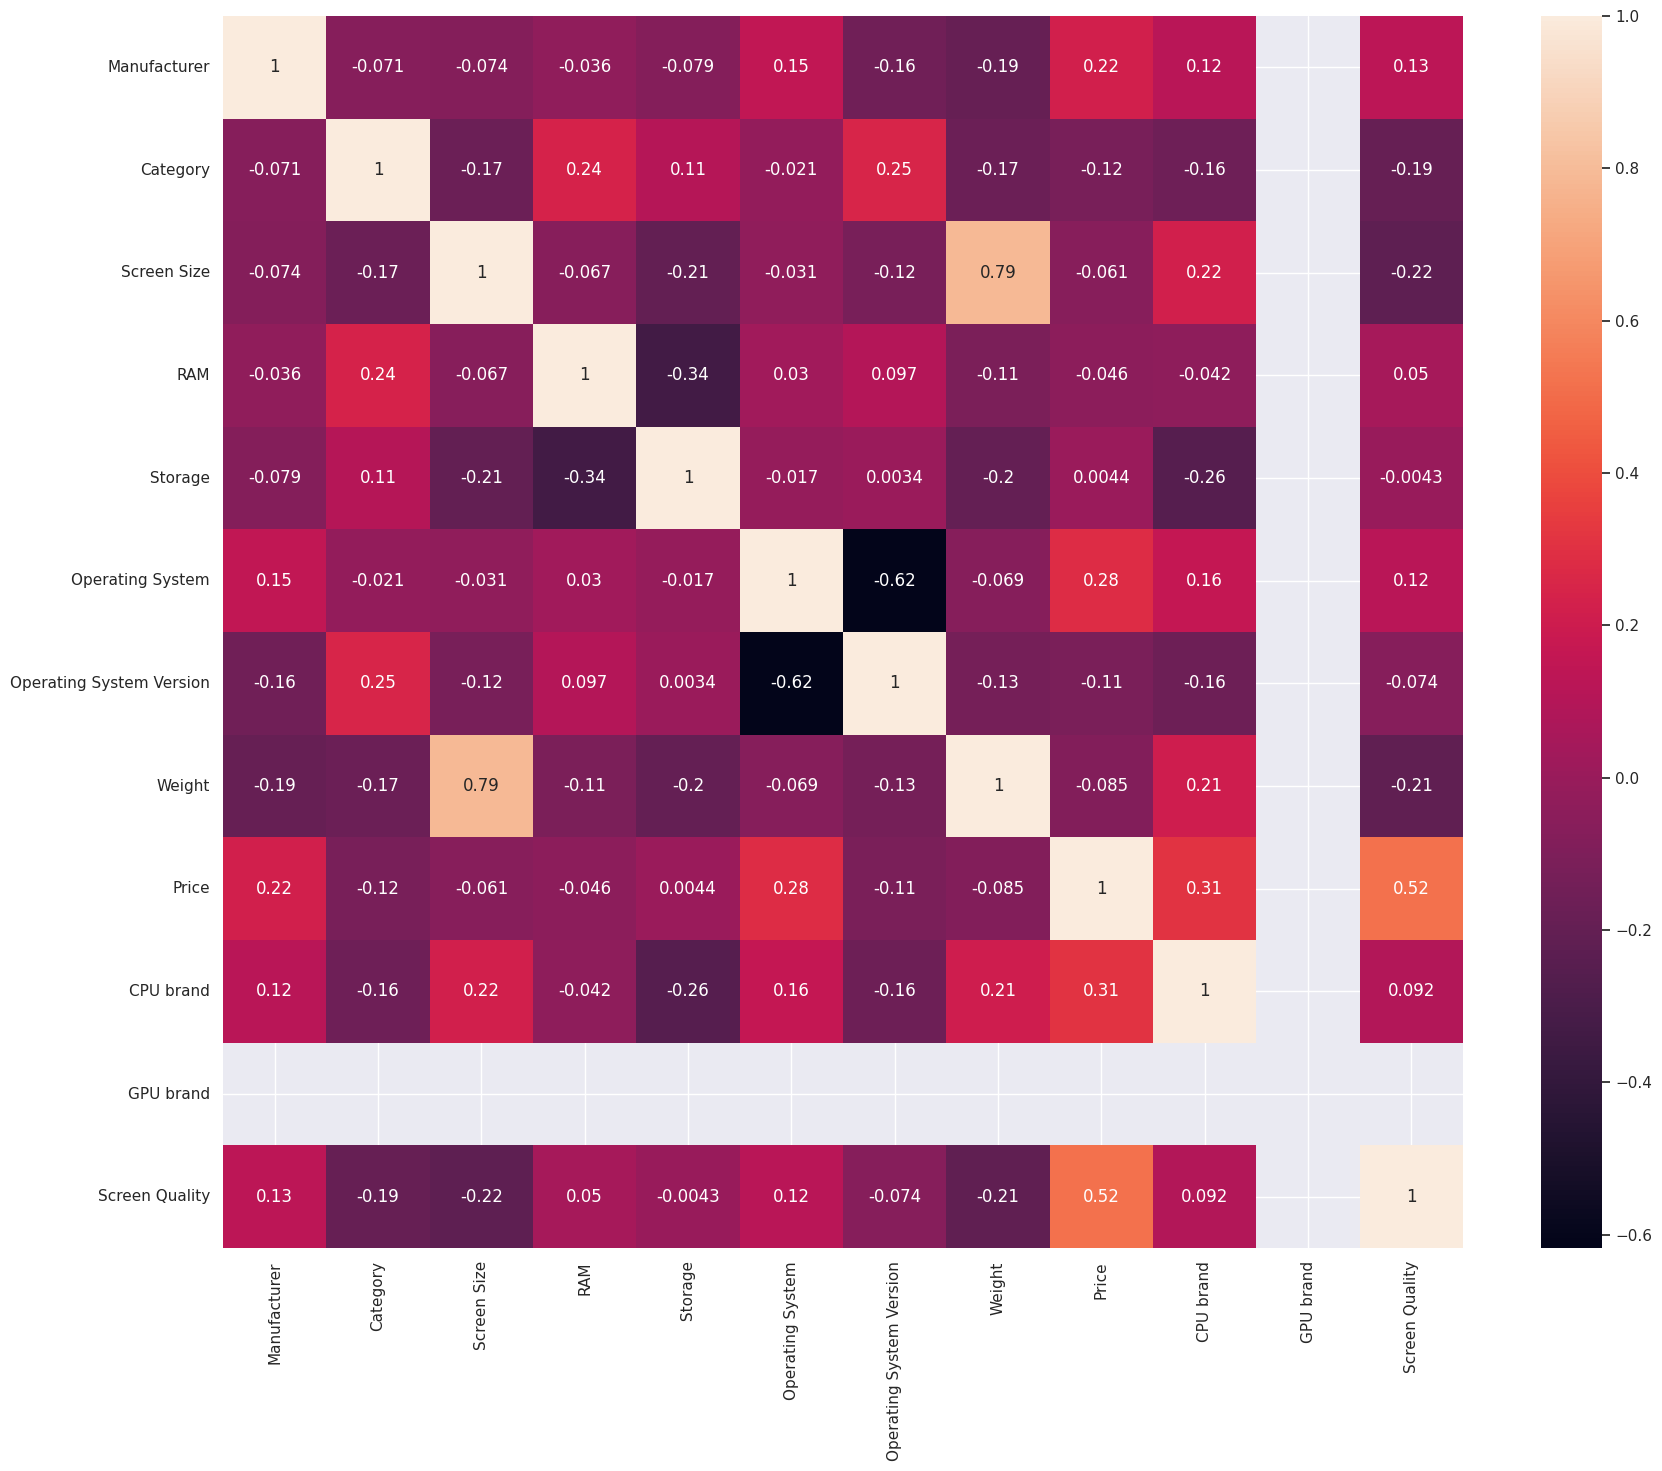

In [40]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df_clean.corr(), fmt='.2g', annot=True)

**Machine Learning Model Building**

In [41]:
x = df_clean.drop('Price', axis=1)
y = df_clean['Price']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_clean.drop('Price', axis=1)
y = df_clean['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Decision Tree Regressor**

In [43]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Fetch the Boston housing dataset from its original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Create a DecisionTreeRegressor object 
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values 
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 4, 6, 8],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(data, target)

# Print the best hyperparameters 
print(grid_search.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0}


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [44]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=8, max_features='sqrt', min_samples_leaf=3, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=3,
                      random_state=0)

In [45]:
from sklearn import metrics
import math 

y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 2497472.643444651
MSE is 14958373257834.621
R2 score is 0.6385037127641695
RMSE score is 3867605.6233585426


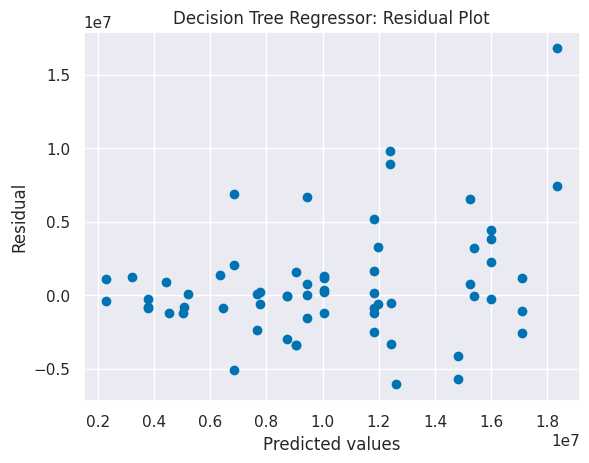

In [46]:
residuals = y_test - y_pred

#Create a scatter plot of predicted values vs residuals
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residual")
plt.title("Decision Tree Regressor: Residual Plot")
plt.show()

**Feature Imporatnce**

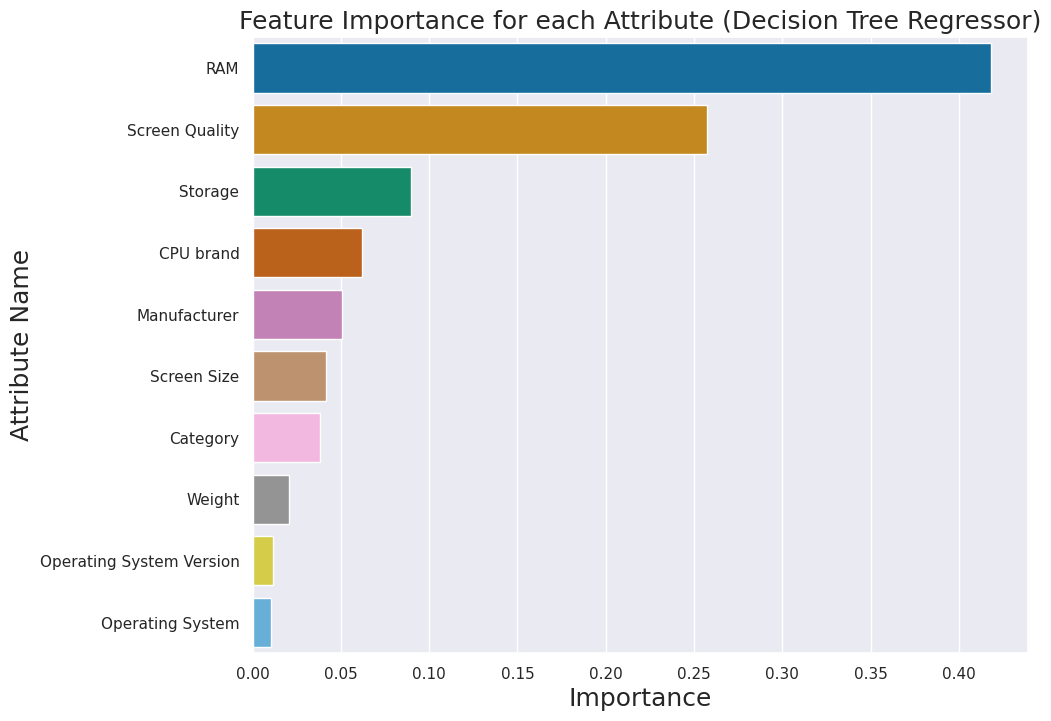

In [51]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

top_features = fi.head(10)
plt.figure(figsize=(10, 8))
sns.barplot(data=top_features, x='Importance', y='Feature Name')
plt.title('Feature Importance for each Attribute (Decision Tree Regressor)', fontsize=18)
plt.xlabel('Importance', fontsize=18)
plt.ylabel('Attribute Name', fontsize=18)
plt.show()

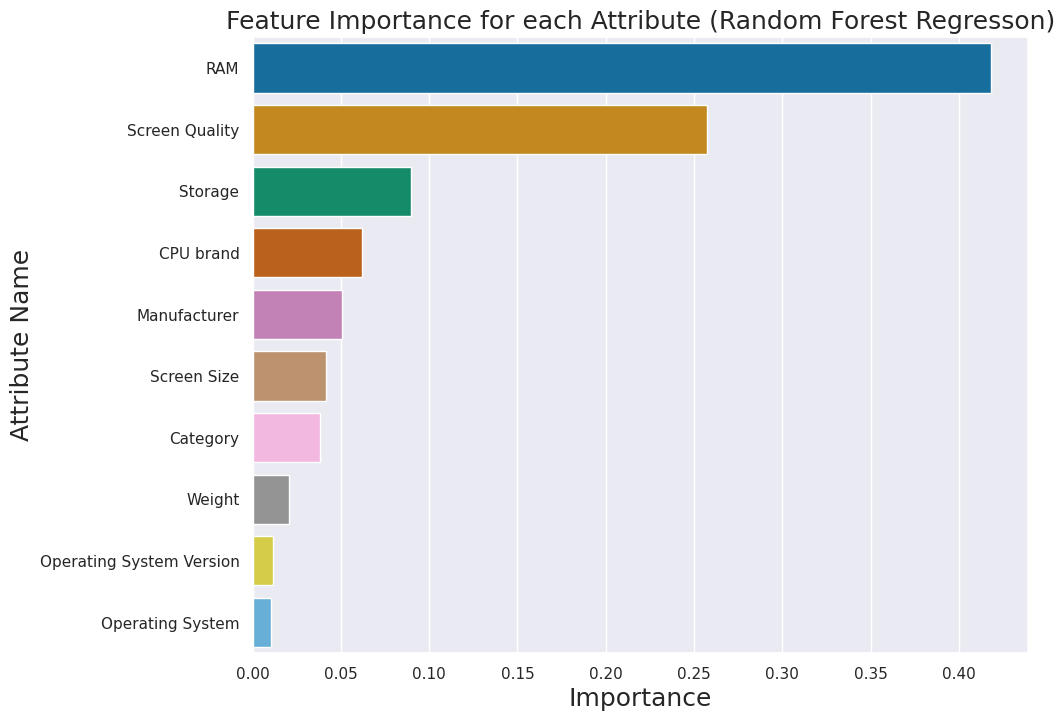

In [52]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

top_features = fi.head(10)
plt.figure(figsize=(10, 8))
sns.barplot(data=top_features, x='Importance', y='Feature Name')
plt.title('Feature Importance for each Attribute (Random Forest Regresson)', fontsize=18)
plt.xlabel('Importance', fontsize=18)
plt.ylabel('Attribute Name', fontsize=18)
plt.show()

**Apply to test data**

In [58]:
df_test = pd.read_csv('laptops_test.csv')

In [59]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,4881708.0


**Clean the Dataset**

In [60]:
# Remove 'kg' suffix from 'Weight' column
df_test['Weight'] = df_test['Weight'].str.rstrip('kg')  # using rstrip() instead of strip() to only remove from the right side of the string

# Remove double quotes suffix from 'Screen Size' column
df_test['Screen Size'] = df_test['Screen Size'].str.rstrip('"')  # using rstrip() instead of strip() to only remove from the right side of the string

# Print first few rows of modified dataframe
print(df_test.head())

  Manufacturer                         Model Name            Category  \
0           HP  15-bs053od (i7-7500U/6GB/1TB/W10)            Notebook   
1         Asus                   Rog GL753VE-DS74              Gaming   
2         Dell                      Inspiron 7579  2 in 1 Convertible   
3      Toshiba                  Portege Z30-C-1CV            Notebook   
4       Lenovo                  IdeaPad 320-15ABR            Notebook   

  Screen Size                                     Screen  \
0        15.6                                   1366x768   
1        17.3                          Full HD 1920x1080   
2        15.6  IPS Panel Full HD / Touchscreen 1920x1080   
3        13.3                          Full HD 1920x1080   
4        15.6                          Full HD 1920x1080   

                           CPU   RAM               Storage  \
0   Intel Core i7 7500U 2.7GHz   6GB               1TB HDD   
1  Intel Core i7 7700HQ 2.8GHz  16GB  256GB SSD +  1TB HDD   
2   Intel Core

In [61]:
df_test['CPU brand'] = df_test['CPU'].apply(fetch_processor)

<Axes: >

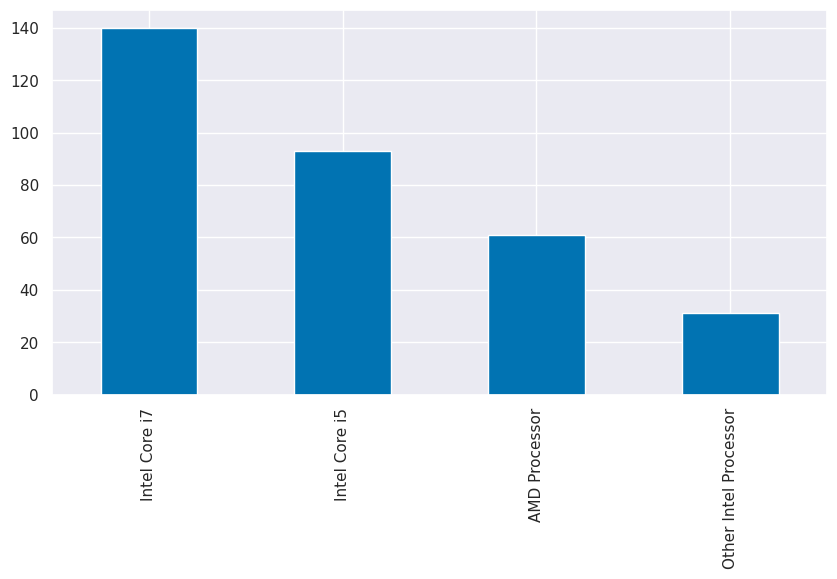

In [63]:
plt.figure(figsize=(10,5))
df_test['CPU brand'].value_counts().plot(kind='bar')

In [64]:
df_test['GPU brand'] = df_test['GPU'].apply(fetch_processor)

<Axes: >

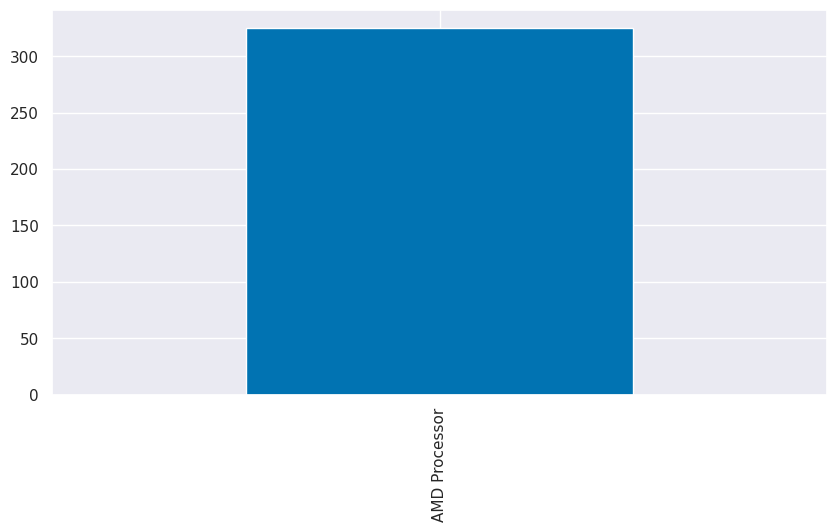

In [65]:
plt.figure(figsize=(10,5))
df_test['GPU brand'].value_counts().plot(kind='bar')

In [67]:
df_test['Operating System'] = df_test['Operating System'].replace('Mac OS', 'macOS')

In [72]:
df_test['Screen Quality'] = df_test['Screen'].str.slice(-9)

<Axes: >

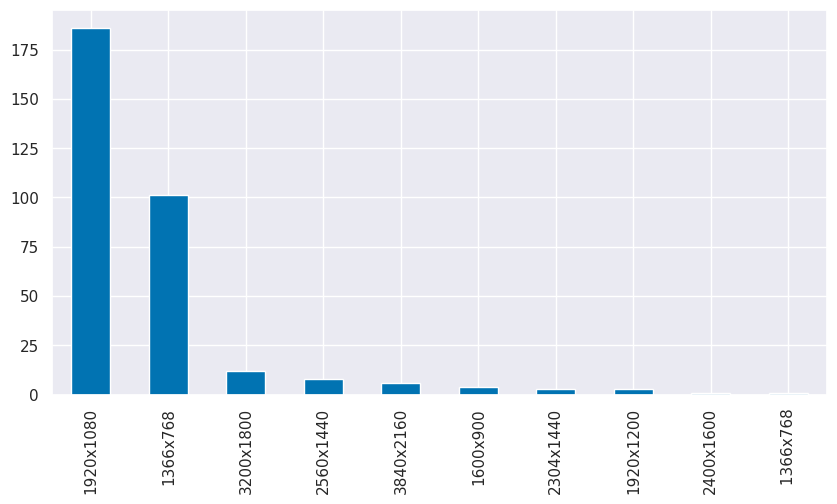

In [73]:
plt.figure(figsize=(10,5))
df_test['Screen Quality'].value_counts().plot(kind='bar')

In [96]:
df_test['Storage'] = df_test[' Storage'].replace('fetch_Storage')

<Axes: >

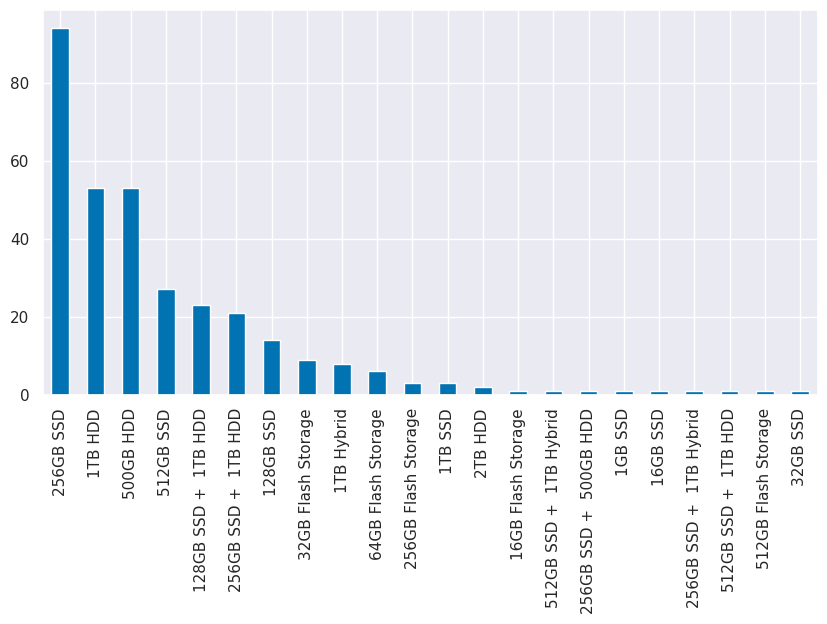

In [98]:
plt.figure(figsize=(10,5))
df_test['Storage'].value_counts().plot(kind='bar')

In [99]:
df_test.drop(columns=['Model Name', 'Screen', 'CPU', 'Storage', 'GPU'], inplace=True)
print(df_test.shape)

(325, 12)


In [100]:
df_test.head()

,Manufacturer,Category,Screen Size,RAM,Storage,Operating System,Operating System Version,Weight,Price,CPU brand,GPU brand,Screen Quality
0,HP,Notebook,15.6,6GB,1TB HDD,Windows,10,2.04,5148468.0,Intel Core i7,AMD Processor,1366x768
1,Asus,Gaming,17.3,16GB,256GB SSD + 1TB HDD,Windows,10,2.99,15552108.0,Intel Core i7,AMD Processor,1920x1080
2,Dell,2 in 1 Convertible,15.6,12GB,512GB SSD,Windows,10,2.19,11550708.0,Intel Core i7,AMD Processor,1920x1080
3,Toshiba,Notebook,13.3,4GB,128GB SSD,Windows,7,1.2,10625940.0,Intel Core i5,AMD Processor,1920x1080
4,Lenovo,Notebook,15.6,6GB,256GB SSD,Windows,10,2.2,4881708.0,AMD Processor,AMD Processor,1920x1080


In [102]:
check_missing = df_test.isnull().sum() * 100 / df_test.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Operating System Version    10.461538
dtype: float64

In [104]:
df_test.fillna('Unknown', inplace=True)
df_test.head()

,Manufacturer,Category,Screen Size,RAM,Storage,Operating System,Operating System Version,Weight,Price,CPU brand,GPU brand,Screen Quality
0,HP,Notebook,15.6,6GB,1TB HDD,Windows,10,2.04,5148468.0,Intel Core i7,AMD Processor,1366x768
1,Asus,Gaming,17.3,16GB,256GB SSD + 1TB HDD,Windows,10,2.99,15552108.0,Intel Core i7,AMD Processor,1920x1080
2,Dell,2 in 1 Convertible,15.6,12GB,512GB SSD,Windows,10,2.19,11550708.0,Intel Core i7,AMD Processor,1920x1080
3,Toshiba,Notebook,13.3,4GB,128GB SSD,Windows,7,1.2,10625940.0,Intel Core i5,AMD Processor,1920x1080
4,Lenovo,Notebook,15.6,6GB,256GB SSD,Windows,10,2.2,4881708.0,AMD Processor,AMD Processor,1920x1080


In [106]:
# Loop over each column in the Dataframe where dtype is 'object'
for col in df_test.select_dtypes(include=['object']).columns:

  # Print the column name and the unique values 
  print(f"{col}: {df_test[col].unique()}")

Manufacturer: ['HP' 'Asus' 'Dell' 'Toshiba' 'Lenovo' 'Fujitsu' 'Acer' 'MSI' 'Vero'
 'Apple' 'Razer' 'Samsung']
Category: ['Notebook' 'Gaming' '2 in 1 Convertible' 'Netbook' 'Ultrabook'
 'Workstation']
Screen Size: ['15.6' '17.3' '13.3' '14.0' '12.5' '11.6' '12.0' '10.1' '12.3' '15.0']
RAM: ['6GB' '16GB' '12GB' '4GB' '8GB' '2GB' '64GB' '32GB']
 Storage: ['1TB HDD' '256GB SSD +  1TB HDD' '512GB SSD' '128GB SSD' '256GB SSD'
 '500GB HDD' '128GB SSD +  1TB HDD' '1TB Hybrid' '32GB Flash Storage'
 '256GB SSD +  500GB HDD' '16GB Flash Storage' '1TB SSD' '2TB HDD'
 '256GB Flash Storage' '512GB SSD +  1TB Hybrid' '64GB Flash Storage'
 '1GB SSD' '16GB SSD' '256GB SSD +  1TB Hybrid' '512GB SSD +  1TB HDD'
 '512GB Flash Storage' '32GB SSD']
Operating System: ['Windows' 'No OS' 'Chrome OS' 'macOS' 'Linux' 'Android']
Operating System Version: ['10' '7' 'Unknown' 'X']
Weight: ['2.04' '2.99' '2.19' '1.2' '2.2' '2.3' '1.75' '2.25' '2.5' '2.36' '1.6'
 '0.97' '2.1' '1.9' '1.68' '1.4' '1.11' '2.4' '1.48' '

In [108]:
from sklearn import preprocessing 

# Loop over each column in the DataFrame where dtype is 'object'
for col in df_test.select_dtypes(include=['object']).columns:
       # Initialize a LabelEncoder object 
       label_encoder = preprocessing.LabelEncoder()
       
       # Fit the encoder to the unique values in the column 
       label_encoder.fit(df_test[col].unique())

       # Transform the column using the encoder 
       df_test[col] = label_encoder.transform(df_test[col])

       # Print the column using the unique encoded values 
       print(f"{col}: {df_test[col].unique()}")

Manufacturer: [ 5  2  3 10  6  4  0  7 11  1  8  9]
Category: [3 1 0 2 4 5]
Screen Size: [8 9 5 6 4 1 2 0 3 7]
RAM: [6 1 0 4 7 2 5 3]
 Storage: [ 5 10 18  0  9 16  1  6 14 12  2  7 13  8 20 21  4  3 11 19 17 15]
Operating System: [4 3 1 5 2 0]
Operating System Version: [0 1 2 3]
Weight: [48 83 55 11 57 64 36 62 71 68 31  2 53 41 34 22  7 69 27 78 19 54 33 43
 23 77 15 30 28 29 26 51 52 65 17 76 38 37 25 92 96  6 42 44 82 97 66 91
 32 86  1 49 18 85  3  0 35 39 74 95 58 81 72  9 61 12 14  4 90 20 46 89
 60 84 40 80 47 16 75 24 88 50 21 45 73 94  8 59 70 87 56  5 79 67 13 93
 63 10]
CPU brand: [2 1 0 3]
GPU brand: [0]
Screen Quality: [1 3 8 9 7 5 2 4 6 0]


**Price Predictin on Test Data**

In [128]:
y_pred_prob = rf.predict_proba(df_test)
y_pred_prob_df = pd.DataFrame(data=y_pred_prob)
y_pred_prob_df

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
320,1.0
321,1.0
322,1.0
323,1.0
